# [Uniform Manifold Approximation and Projection (UMAP)](https://towardsdatascience.com/dimensionality-reduction-for-data-visualization-pca-vs-tsne-vs-umap-be4aa7b1cb29)
  
- UMAP is a dimension reduction technique for embedding high-dimensional data into a lower-dimensional space while preserving the data's intrinsic structure. 

- It is particularly well-suited for visualizing high-dimensional data sets, as it can effectively preserve the `global` and `local` structure of the data while being `computationally efficient`.
-  It is a manifold learning technique, which means that it assumes that the data lies on a lower-dimensional manifold embedded in a higher-dimensional space. 


## Advantages of UMAP

- **Preservation of Global Structure:** UMAP effectively preserves the global structure of the data, meaning that the relative positions of data points in the low-dimensional embedding are consistent with their relative positions in the original high-dimensional space. This is important for tasks such as `visualization` and `anomaly detection`.

- **Preservation of Local Structure:** UMAP also preserves the local structure of the data, meaning that the distances and densities of neighboring data points are well-represented in the low-dimensional embedding. This is important for tasks such as clustering and classification.

- **Computational Efficiency:** UMAP is computationally efficient, making it scalable to large datasets. The algorithm utilizes a stochastic approach that scales linearly with the number of data points, allowing it to handle large datasets without requiring excessive computational resources.

- **Visualization Quality:** UMAP produces high-quality visualizations of high-dimensional data, making it a valuable tool for exploring and understanding complex datasets. The embeddings generated by UMAP often reveal patterns and relationships that are difficult to discern in the original high-dimensional space.

## Applications

- **Data Visualization:** UMAP is particularly well-suited for visualizing high-dimensional data, as it can effectively preserve the global and local structure of the data while producing clear and informative visualizations.

- **Exploratory Data Analysis:** UMAP can be used to explore and analyze high-dimensional data to identify patterns, trends, and anomalies. By embedding the data into a lower-dimensional space, UMAP can reveal hidden relationships and structures that may not be apparent in the original high-dimensional representation.

- **Dimensionality Reduction for Machine Learning:** UMAP can be used as a dimensionality reduction technique to prepare high-dimensional data for machine learning algorithms. By reducing the dimensionality of the data, UMAP can improve the performance and efficiency of machine learning models without compromising their accuracy.

- **Clustering and Segmentation:** UMAP can be used for clustering and segmentation tasks, where the goal is to group data points into meaningful clusters based on their similarities. The low-dimensional embedding produced by UMAP can facilitate the identification of clusters and the separation of different data groups.

- **Anomaly Detection:** UMAP can be used to detect anomalies in high-dimensional data. By analyzing the distribution of data points in the low-dimensional embedding, UMAP can identify outliers and data points that deviate from the expected structure of the data.

- **Natural Language Processing (NLP):** UMAP is increasingly being used in NLP tasks, such as topic modeling and document embedding. It can help to identify and represent the latent topics in text corpora and create semantic representations of documents.

<br>

```sh
pip install umap-learn 
```

In [1]:
# Built-in library
import re
import json
from typing import Any, Optional, TypeAlias, Union
import logging
import warnings

# Standard imports
import numpy as np
from pprint import pprint
import pandas as pd
import polars as pl
from rich import print
import torch

# Visualization
import matplotlib.pyplot as plt


# Pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 600

warnings.filterwarnings("ignore")

# Black code formatter (Optional)
%load_ext lab_black

# auto reload imports
%load_ext autoreload
%autoreload 2

### Load Dataset

In [2]:
from datasets import load_dataset, Dataset, DatasetDict

path: str = "mnist"
mnist: Dataset = load_dataset(path=path)

mnist

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})

In [3]:
mnist.get("train")[0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28>,
 'label': 5}

In [4]:
# Visualize the data
mnist.get("train")[0].get("image")

In [5]:
# Shape of the data
np.array(mnist.get("train")[0].get("image")).shape

(28, 28)

In [8]:
mnist: Dataset = mnist.map(lambda x: {"array": np.array(x.get("image")).reshape(-1)})

mnist

Map:   0%|          | 0/60000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label', 'array'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label', 'array'],
        num_rows: 10000
    })
})

In [9]:
len(mnist.get("train")[0].get("array"))

784

In [11]:
# Min and max
min(mnist.get("train")[0].get("array")), max(mnist.get("train")[0].get("array"))

(0, 255)

In [12]:
# Normalize the data
mnist: Dataset = mnist.map(lambda x: {"array": np.array(x.get("array")) / 255.0})

Map:   0%|          | 0/60000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [13]:
# Min and max
min(mnist.get("train")[0].get("array")), max(mnist.get("train")[0].get("array"))

(0.0, 1.0)

### UMAP Dimensionality Reduction

```sh
pip install umap-learn
```

In [14]:
import umap
import seaborn as sns
from tqdm.auto import tqdm

2023-12-03 14:53:31.860948: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


  0%|          | 0/9 [00:00<?, ?it/s]

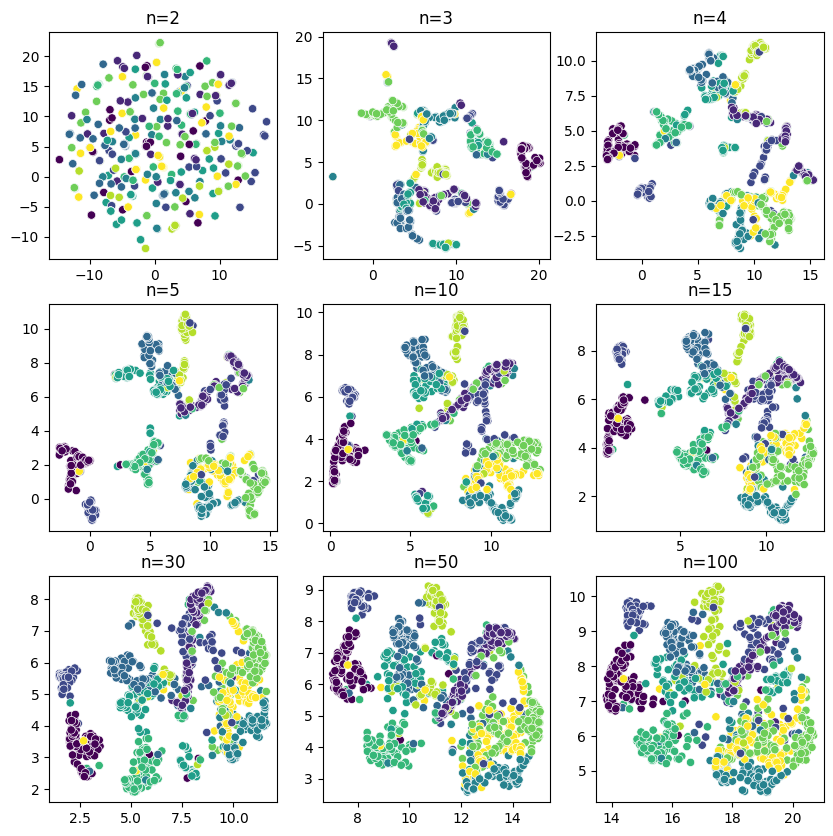

In [21]:
# It took ~6m 20s to run this cell
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
nearest_neighbors: list[int] = [2, 3, 4, 5, 10, 15, 30, 50, 100]

i, j = [0, 0]

for n_neighbor in tqdm(nearest_neighbors):
    # Apply manifold-preserving dimension reduction
    fit = umap.UMAP(n_neighbors=n_neighbor)
    u = fit.fit_transform(mnist.get("train")["array"][:1_000])
    sns.scatterplot(
        x=u[:, 0], y=u[:, 1], c=mnist.get("train")["label"][:1_000], ax=ax[j, i]
    )
    ax[j, i].set_title(f"n={n_neighbor}")
    if i < 2:
        i += 1
    else:
        i = 0
        j += 1

plt.show()

### Apply PCA

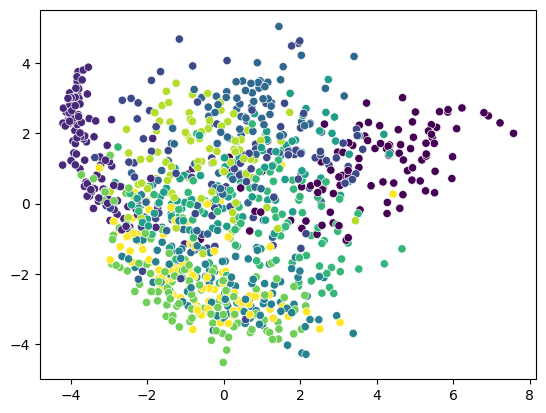

In [23]:
# It took ~40s to run this cell
from sklearn.decomposition import PCA


pca = PCA(n_components=2)  # Create 2-D space
p = pca.fit_transform(mnist.get("train")["array"][:1_000])
sns.scatterplot(x=p[:, 0], y=p[:, 1], c=mnist.get("train")["label"][:1_000])

plt.show()

### TSNE

  0%|          | 0/9 [00:00<?, ?it/s]

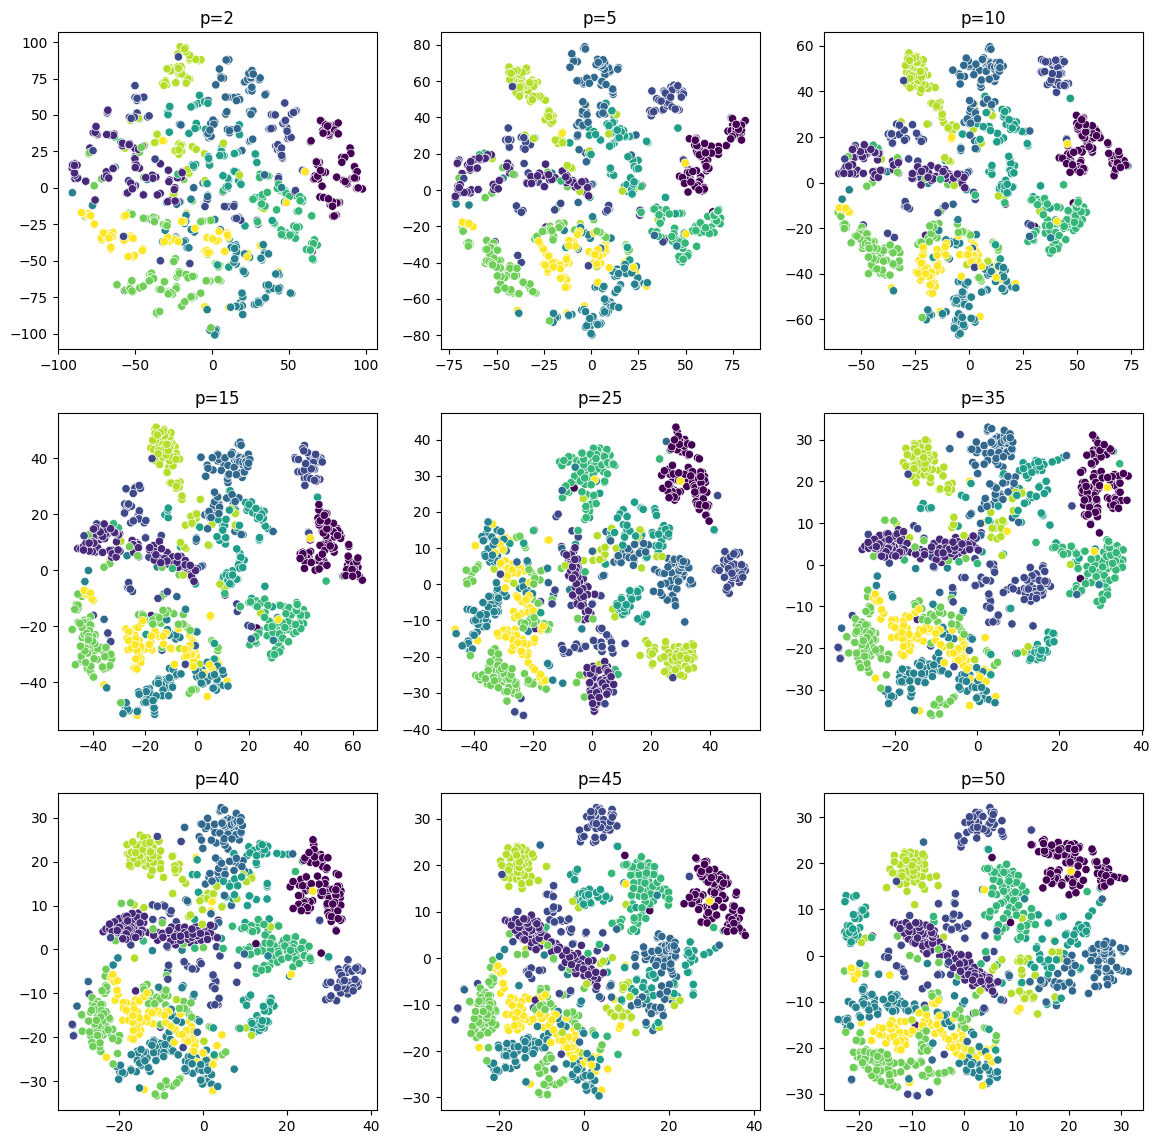

In [29]:
from sklearn.manifold import TSNE


# It took ~4m 37s to run this cell
fig, ax = plt.subplots(3, 3, figsize=(14, 14))
pps: list[int] = [2, 5, 10, 15, 25, 35, 40, 45, 50]

i, j = [0, 0]

for perplexity in tqdm(pps):
    # Apply manifold-preserving dimension reduction
    tsne = TSNE(n_components=2, perplexity=perplexity)
    t = tsne.fit_transform(np.array(mnist.get("train")["array"][:1_000]))
    sns.scatterplot(
        x=t[:, 0], y=t[:, 1], c=mnist.get("train")["label"][:1_000], ax=ax[j, i]
    )
    ax[j, i].set_title(f"p={perplexity}")
    if i < 2:
        i += 1
    else:
        i = 0
        j += 1

plt.show()

# HDBSCAN, or Hierarchical Density-Based Spatial Clustering of Applications with Noise

- `HDBSCAN` is a density-based clustering algorithm that is used to identify clusters in high-dimensional data.
   
- It is particularly well-suited for datasets that contain outliers and noise, as it is able to robustly identify clusters even in the presence of such data points.
  
- HDBSCAN works by identifying core points, which are data points that have a high density of neighboring points, and border points, which are data points that are close to core points but have a lower density of neighbors. 
  
- Clusters are then formed by grouping together `core` points and their associated `border` points.

## Advantages of HDBSCAN

- **Robustness to outliers:** HDBSCAN is able to identify clusters even in the presence of outliers and noise.

- **Ability to handle high-dimensional data:** HDBSCAN can be used to cluster data in high-dimensional spaces.

- **Scalability:** HDBSCAN is scalable to large datasets.

## Applications of HDBSCAN

It is a popular choice for tasks such as: 

- customer segmentation.

- fraud detection. 

- anomaly detection.

<br>

### Installation

```sh
pip install hdbscan
```

In [30]:
import hdbscan

clusterer = hdbscan.HDBSCAN()